<img src="https://upload.wikimedia.org/wikipedia/commons/6/6f/Pima.jpg" width=200>

* [Pima people - Wikipedia](https://en.wikipedia.org/wiki/Pima_people)

## 데이터셋 출처
* [Pima Indians Diabetes Database | Kaggle](https://www.kaggle.com/uciml/pima-indians-diabetes-database)
* https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html


### 데이터 구성

* Pregnancies : 임신 횟수
* Glucose : 2시간 동안의 경구 포도당 내성 검사에서 혈장 포도당 농도 
* BloodPressure : 이완기 혈압 (mm Hg)
* SkinThickness : 삼두근 피부 주름 두께 (mm), 체지방을 추정하는데 사용되는 값
* Insulin : 2시간 혈청 인슐린 (mu U / ml)
* BMI : 체질량 지수 (체중kg / 키(m)^2)
* DiabetesPedigreeFunction : 당뇨병 혈통 기능
* Age : 나이
* Outcome : 768개 중에 268개의 결과 클래스 변수(0 또는 1)는 1이고 나머지는 0입니다.


<img src="https://i.imgur.com/yvBtRtJ.png" width="600">

## 필요한 라이브러리 로드

In [3]:
# 데이터 분석을 위한 pandas, 수치계산을 위한 numpy
# 시각화를 위한 seaborn, matplotlib.pyplot 을 로드합니다. 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 데이터셋 로드

In [4]:
df = pd.read_csv("http://bit.ly/data-diabetes-csv")

In [6]:
print('df.shape :',df.shape)
df.head()

df.shape : (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
print('결측치 :',df.isna().sum().sum())

결측치 : 0


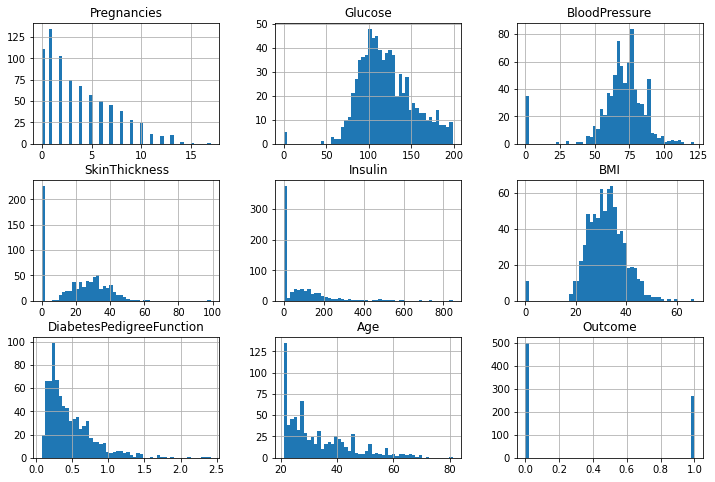

In [14]:
_ = df.hist(figsize=(12,8),bins=50)

## 학습과 예측 전체 과정

* feature_names : 학습(훈련), 예측에 사용할 컬럼을 리스트 형태로 만들어서 변수에 담아줍니다.
* label_name : 정답값

* X_train : feature_names 에 해당되는 컬럼만 train에서 가져옵니다.
    * 학습(훈련)에 사용할 데이터셋 예) 시험의 기출문제

* X_test : feature_names 에 해당되는 컬럼만 test에서 가져옵니다.
    * 예측에 사용할 데이터셋 예) 실전 시험문제

* y_train : label_name 에 해당 되는 컬럼만 train에서 가져옵니다.
    * 학습(훈련)에 사용할 정답 값 예) 기출문제의 정답

* model : 학습, 예측에 사용할 머신러닝 알고리즘

* model.fit(X_train, y_train) : 학습(훈련), 기출문제와 정답을 가지고 학습(훈련)하는 과정과 유사합니다.

* model.predict(X_test) :  예측, 실제 시험을 보는 과정과 유사합니다. => 문제를 풀어서 정답을 구합니다.

* score
    * 시험을 봤다면 몇 문제를 맞고 틀렸는지 채점해 봅니다.
* metric
    * 점수를 채점하는 공식입니다. (예를 들어 학교에서 중간고사를 봤다면 전체 평균을 계산해 줍니다.)


## 학습, 예측 데이터셋 나누기

In [25]:
# 8:2 의 비율로 구하기 위해 전체 데이터의 행에서 80% 위치에 해당되는 값을 구해서 split_count 라는 변수에 담습니다.
split_count = int(df.shape[0] * 0.8)
split_count

614

In [36]:
# train, test로 슬라이싱을 통해 데이터를 나눕니다.
train = df.iloc[:614,:]
train.shape

(614, 9)

In [37]:
test = df.iloc[614:,:]
test.shape

(154, 9)

In [38]:
df.shape[0] == train.shape[0] + test.shape[0]

True

## 학습, 예측에 사용할 컬럼

In [47]:
# feature_names 라는 변수에 학습과 예측에 사용할 컬럼명을 가져옵니다.
feature_names = df.columns.difference(['Outcome'])
feature_names

Index(['Age', 'BMI', 'BloodPressure', 'DiabetesPedigreeFunction', 'Glucose',
       'Insulin', 'Pregnancies', 'SkinThickness'],
      dtype='object')

## 정답값이자 예측해야 될 값

In [48]:
# label_name 이라는 변수에 예측할 컬럼의 이름을 담습니다.
label_name = 'Outcome'
label_name

'Outcome'

## 학습, 예측 데이터셋 만들기

* X, y를 만들어 줍니다.
* X는 feature, 독립변수, 예) 시험의 문제
* y는 label, 종속변수, 예) 시험의 정답

In [50]:
# 학습 세트 만들기 예) 시험의 기출문제
X_train = train[feature_names]
print('X_train.shape :',X_train.shape)

X_train.shape : (614, 8)


In [51]:
# 정답 값을 만들어 줍니다. 예) 기출문제의 정답
y_train = train[label_name]
print('y_train.shape :',y_train.shape)

y_train.shape : (614,)


In [53]:
# 예측에 사용할 데이터세트를 만듭니다. 예) 실전 시험 문제
X_test = test[feature_names]
print('X_test.shape :',X_test.shape)

X_test.shape : (154, 8)


In [54]:
# 예측의 정답값 예) 실전 시험 문제의 정답
y_test = test[label_name]
print('y_test.shape :',y_test.shape)

y_test.shape : (154,)


## 머신러닝 알고리즘 가져오기
* [결정 트리 학습법 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EA%B2%B0%EC%A0%95_%ED%8A%B8%EB%A6%AC_%ED%95%99%EC%8A%B5%EB%B2%95)


* 결과를 해석하고 이해하기 쉽다.간략한 설명만으로 결정 트리를 이해하는 것이 가능하다.
* 자료를 가공할 필요가 거의 없다.다른 기법들의 경우 자료를 정규화하거나 임의의 변수를 생성하거나 값이 없는 변수를 제거해야 하는 경우가 있다.
* 수치 자료와 범주 자료 모두에 적용할 수 있다.다른 기법들은 일반적으로 오직 한 종류의 변수를 갖는 데이터 셋을 분석하는 것에 특화되어 있다. (일례로 신경망 학습은 숫자로 표현된 변수만을 다룰 수 있는 것에 반해 관계식(relation rules)은 오직 명목 변수만을 다룰 수 있다.
* 화이트박스 모델을 사용한다. 모델에서 주어진 상황이 관측 가능하다면 불 논리를 이용하여 조건에 대해 쉽게 설명할 수 있다. (결과에 대한 설명을 이해하기 어렵기 때문에 인공신경망은 대표적인 블랙 박스 모델이다.)
* 안정적이다. 해당 모델 추리의 기반이 되는 명제가 다소 손상되었더라도 잘 동작한다.
* 대규모의 데이터 셋에서도 잘 동작한다. 방대한 분량의 데이터를 일반적인 컴퓨터 환경에서 합리적인 시간 안에 분석할 수 있다.


```python
DecisionTreeClassifier(
    *,
    criterion='gini', # 분할방법 {"gini", "entropy"}, default="gini"
    splitter='best',
    max_depth=None, # The maximum depth of the tree
    min_samples_split=2, # The minimum number of samples required to split an internal node
    min_samples_leaf=1, # The minimum number of samples required to be at a leaf node.
    min_weight_fraction_leaf=0.0, # The minimum weighted fraction of the sum total of weights
    max_features=None, # The number of features to consider when looking for the best split
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0,
)
```

* 주요 파라미터
    * criterion: 가지의 분할의 품질을 측정하는 기능입니다.
    * max_depth: 트리의 최대 깊이입니다.
    * min_samples_split:내부 노드를 분할하는 데 필요한 최소 샘플 수입니다.
    * min_samples_leaf: 리프 노드에 있어야 하는 최소 샘플 수입니다.
    * max_leaf_nodes: 리프 노드 숫자의 제한치입니다.
    * random_state: 추정기의 무작위성을 제어합니다. 실행했을 때 같은 결과가 나오도록 합니다.

In [166]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree

from sklearn.model_selection import GridSearchCV

## 학습(훈련)
* 시험을 볼 때 기출문제(X_train)와 정답(y_train)을 보고 공부하는 과정과 유사합니다.

In [155]:
dt_clf = DecisionTreeClassifier(max_depth = 4, min_samples_split = 2, max_leaf_nodes = 50, criterion='gini',random_state=42)
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=50, random_state=42)

## 예측
* 실전 시험문제(X_test)라고 보면 됩니다. 우리가 정답을 직접 예측합니다.

In [156]:
pred = dt_clf.predict(X_test)
print('pred.shape :',len(pred))
pred[:4]

pred.shape : 154


array([1, 0, 1, 0], dtype=int64)

## 트리 알고리즘 분석하기
* 의사결정나무를 시각화 합니다.

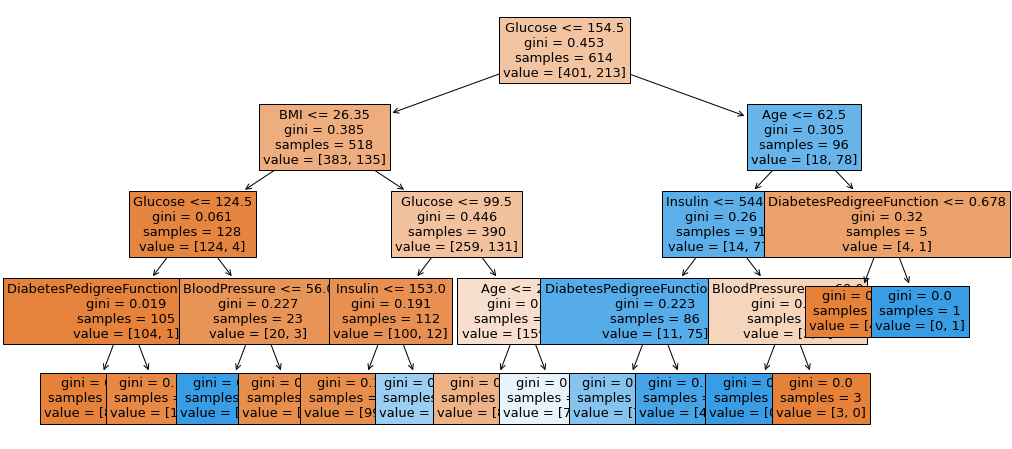

In [157]:
# plot_tree 를 통해 시각화 합니다.
plt.figure(figsize=(16,8))
plot_tree(dt_clf, filled=True, fontsize=13, feature_names = feature_names)
plt.show()

In [158]:
# 피처의 중요도를 추출하기
ft_imp = np.round(dt_clf.feature_importances_,4)
list_str = X_train.columns
imp_series = pd.Series(ft_imp,list_str).sort_values(ascending=False)
imp_series

Glucose                     0.6147
BMI                         0.1658
Age                         0.1144
Insulin                     0.0374
BloodPressure               0.0369
DiabetesPedigreeFunction    0.0308
Pregnancies                 0.0000
SkinThickness               0.0000
dtype: float64

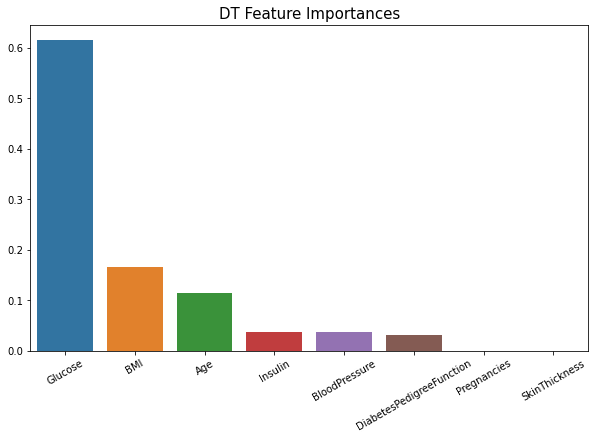

In [159]:
# 피처의 중요도 시각화 하기
plt.figure(figsize=(10,6))
ax = sns.barplot(x = imp_series.index, y = imp_series.values)
plt.xticks(rotation=30)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
plt.title('DT Feature Importances',size=15)
plt.show()

## 정확도(Accuracy) 측정하기

* 모델이 얼마나 잘 예측했는지 측정해 봅니다.
* 시험을 보고 나서 몇 개 맞았는지 틀렸는지 채점해 보는 과정과 유사하다고 보면 됩니다.
* 실전 문제에서는 답이 없어서 우리가 예측을 해야겠지만 이 실습은 정답이 있는 모의고사 입니다. 
* 모의고사를 보면 내 실력이 어느정도 되는지 예측해 보는 것처럼 점수를 측정해 봅니다.

In [160]:
# 예측의 정확도를 구합니다. 100점 만점 중에 몇 점을 맞았는지 구한다고 보면 됩니다.
print('ACC :',np.round((y_test == pred).mean(),4))

ACC : 0.7662


In [161]:
# 위에서 처럼 직접 구할 수도 있지만 미리 구현된 알고리즘을 가져와 사용합니다.
print('ACC :',np.round(accuracy_score(pred,y_test),4))

ACC : 0.7662


In [163]:
# model 의 score 로 점수를 계산합니다.
print('ACC :',np.round(dt_clf.score(X_test,y_test),4))

ACC : 0.7662


In [167]:
pred_train = dt_clf.predict(X_train)
print('ACC :',np.round(accuracy_score(pred_train,y_train),4))

ACC : 0.7818


## GridSearchCV

In [197]:
model = DecisionTreeClassifier()
param_grid = {
    'max_depth' : np.arange(3,20),
    'min_samples_leaf': np.arange(50,200,10),
    'max_leaf_nodes' : np.arange(10,100,10)
}

best = GridSearchCV(model, param_grid = param_grid, cv=5, refit=True)

best.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),
                         'max_leaf_nodes': array([10, 20, 30, 40, 50, 60, 70, 80, 90]),
                         'min_samples_leaf': array([ 50,  60,  70,  80,  90, 100, 110, 120, 130, 140, 150, 160, 170,
       180, 190])})

In [198]:
best_param = best.best_params_
best_param

{'max_depth': 5, 'max_leaf_nodes': 10, 'min_samples_leaf': 50}

In [199]:
best_est = best.best_estimator_
best_pred = best_est.predict(X_test)

In [200]:
print('ACC :',np.round(accuracy_score(best_pred,y_test),4))

ACC : 0.7727


In [201]:
best_pred_train = best_est.predict(X_train)
print('ACC :',np.round(accuracy_score(best_pred_train,y_train),4))

ACC : 0.7932
